In [29]:
# Importing the libraries
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

from IPython.display import HTML

sns.set()

In [30]:
# Quantile Function Definitions
def q1(x):
    return x.quantile(0.28)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.72)

In [31]:
station_name = 'picadacorbo'
DISCHARGE_DAILY = pd.read_csv(f'../data/{station_name}_caudales.csv',parse_dates=['Fecha'],index_col="Fecha",dayfirst=True,na_values="NA")

In [32]:
# Identify the missing data from a date range (1980 to 2023)
DISCHARGE_DAILY_date_missing = pd.date_range(start = DISCHARGE_DAILY.index[0].strftime('%Y-%m-%d'), end = DISCHARGE_DAILY.index[-1].strftime('%Y-%m-%d'),freq='D')
# Re-index the dataframe based on the missind date variable
DISCHARGE_DAILY = DISCHARGE_DAILY.reindex(DISCHARGE_DAILY_date_missing,fill_value=None)
# Set index Fecha
DISCHARGE_DAILY.index.name = 'date' 
# Change columns names
DISCHARGE_DAILY.columns = ['station','discharge']
# Remove station code column
DISCHARGE_DAILY = DISCHARGE_DAILY.drop(columns='station')
## create column for day, month, year in the daily discharge ()
DISCHARGE_DAILY['year'] = DISCHARGE_DAILY.index.year
DISCHARGE_DAILY['month'] = DISCHARGE_DAILY.index.month
DISCHARGE_DAILY['monthday'] = DISCHARGE_DAILY.index.day_of_year
# Print the last 6 values
HTML(DISCHARGE_DAILY.tail(6).to_html())

,discharge,year,month,monthday
date,,,,
2023-10-26,12.689,2023,10,299
2023-10-27,9.470,2023,10,300
2023-10-28,7.539,2023,10,301
2023-10-29,NaN,2023,10,302
2023-10-30,4.641,2023,10,303
2023-10-31,4.287,2023,10,304


In [33]:
YEAR_SELECTED = np.unique(DISCHARGE_DAILY['year'])
DISCHARGE_DAILY_PIVOT = pd.pivot_table(DISCHARGE_DAILY,index=['monthday'],columns=['year'], values=['discharge'],dropna=False)
DISCHARGE_DAILY_PIVOT.columns = YEAR_SELECTED

In [34]:
HTML(DISCHARGE_DAILY_PIVOT.tail(5).to_html())

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
monthday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
362,5.862,7.822,NaN,NaN,NaN,NaN,16.254,8.622,1.340,2.750,10.217,6.507,3.737,24.286,6.108,8.501,NaN,1441.773,12.540,NaN,1.607,5.706,50.541,9.392,2.955,1.660,2.626,3.999,0.351,22.283,2.273,7.175,NaN,NaN,23.311,17.740,NaN,1.678,NaN,3.651,0.649,1.120,0.653,NaN
363,4.654,6.200,NaN,NaN,NaN,NaN,15.287,7.677,1.340,2.133,9.078,6.204,3.731,28.023,5.583,6.690,NaN,423.662,26.887,NaN,1.999,5.221,61.622,45.736,2.630,1.548,2.350,4.013,0.301,28.870,1.850,6.852,NaN,NaN,18.139,14.035,NaN,1.531,NaN,3.953,0.598,1.052,0.635,NaN
364,4.272,5.170,NaN,NaN,NaN,NaN,14.754,28.516,1.340,1.611,7.990,6.070,3.591,23.367,4.936,5.656,NaN,210.780,84.079,NaN,3.006,4.848,74.589,123.247,2.362,1.457,2.080,3.476,0.319,43.527,1.585,6.539,NaN,NaN,15.065,12.060,NaN,1.388,NaN,3.813,0.536,0.971,0.572,NaN
365,4.272,7.333,NaN,NaN,NaN,NaN,13.418,51.483,1.331,1.340,7.495,5.693,3.473,18.465,4.744,4.997,NaN,128.215,85.426,NaN,3.669,4.693,76.462,78.309,4.545,1.381,1.840,3.242,0.416,90.406,1.454,6.227,NaN,NaN,17.048,13.307,NaN,1.282,NaN,3.670,0.552,0.925,0.525,NaN
366,4.272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.190,NaN,NaN,NaN,3.404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.604,NaN,NaN,NaN,35.999,NaN,NaN,NaN,0.383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.574,NaN,NaN,NaN


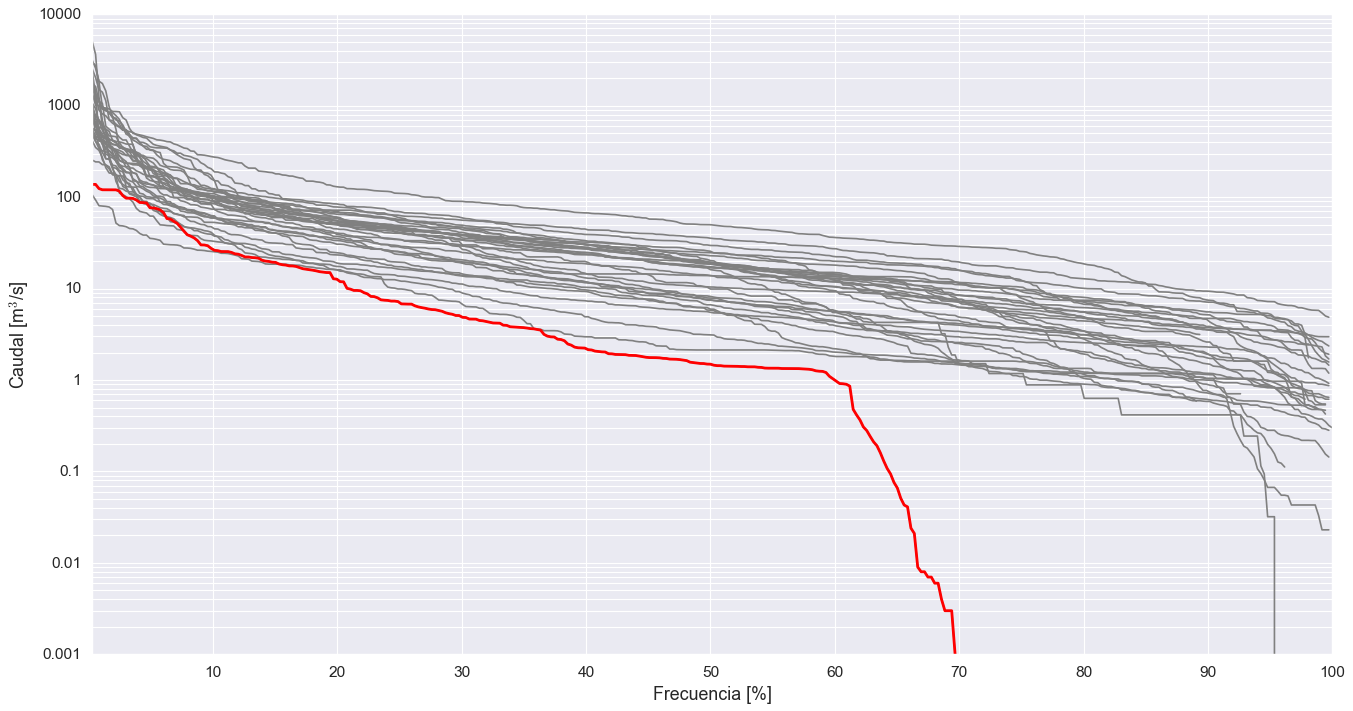

In [35]:
plt.figure(figsize=(20, 10))
df_sorted = pd.DataFrame()

for column in DISCHARGE_DAILY_PIVOT.columns:
    sorted_column = DISCHARGE_DAILY_PIVOT[column].sort_values(ascending=False)
    df_sorted[column] = sorted_column
    DISCHARGE_DAILY_PIVOT[column] = np.arange(1., len(sorted_column) + 1) / len(sorted_column)
    pct_nan = (np.sum(np.isnan(sorted_column))/len(sorted_column))*100
    if pct_nan < 20:
        plt.plot(DISCHARGE_DAILY_PIVOT[column]*100, sorted_column,color='gray')
        plt.yscale('log')  # Set y-axis to logarithmic scale
    else:
        continue


plt.xticks([0,10,20,30,40,50,60,70,80,90,100],labels=['0','10','20','30','40','50','60','70','80','90','100']);
plt.xlabel('Frecuencia [%]',fontsize=16);
plt.ylabel('Caudal [m$^3$/s]',fontsize=16);
 
year_selected = 2023
plt.plot(DISCHARGE_DAILY_PIVOT[year_selected]*100,df_sorted[year_selected].sort_values(ascending=False),color='red',linewidth=2.5)
# plt.plot(DISCHARGE_DAILY_PIVOT.iloc[:, -1]*100, sorted_column,color='red');

import matplotlib.ticker as ticker
def myLogFormat(y,pos):
    # Find the number of decimal places required
    decimalplaces = int(np.maximum(-np.log10(y),0))     # =0 for numbers >=1
    # Insert that number into a format string
    formatstring = '{{:.{:1d}f}}'.format(decimalplaces)
    # Return the formatted tick label
    return formatstring.format(y)

y_axis = plt.gca().yaxis
y_axis.set_major_formatter(ticker.FuncFormatter(myLogFormat))

# Adjust the font size for tick labels on both axes
plt.grid(True,'major')
plt.grid(True,'minor')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

